# Clustering Smart meter data from UK CNLR project

Import libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans

Read daily energy meter reading and print head

In [3]:
file='TrialMonitoringDataDailyLogica.csv'

df = pd.read_csv(file)
print(df.head())

   Location ID   Measurement Description             Parameter Type and Units  \
0         5346  Electricity supply meter  Cumulative energy consumption [kWh]   
1         5346  Electricity supply meter  Cumulative energy consumption [kWh]   
2         5346  Electricity supply meter  Cumulative energy consumption [kWh]   
3         5346  Electricity supply meter  Cumulative energy consumption [kWh]   
4         5346  Electricity supply meter  Cumulative energy consumption [kWh]   

  Date and Time of capture  Parameter  
0         27/05/2011 00:00   5963.856  
1         01/09/2011 00:00   7150.668  
2         18/05/2011 00:00   5831.751  
3         10/09/2011 00:00   7230.055  
4         28/08/2011 00:00   7088.430  


Drop the unecesary features

In [5]:
df=df.drop('Parameter Type and Units',1)
df=df.drop('Measurement Description',1)

Change the names of the columns

In [6]:
df.columns = ['customer', 'datetime', 'consumption']

Change columns to the right type of data

In [7]:
df.datetime = pd.to_datetime(df.datetime,infer_datetime_format=True)

Remove data which is not collected at 00:00

In [8]:
df1 = df[df.datetime.dt.hour==0]
df2 = df1[df1.datetime.dt.minute==0]

transform shape of the df by putting customers on columns

In [9]:
df_pivot=df2.pivot(index='datetime', columns='customer', values='consumption')

Transform consumption from total (meter reading) to daily

In [10]:
for index in range(df_pivot.shape[1]) :
    s = pd.Series(df_pivot.iloc[:,index])
    x=s.diff()
    df_pivot.iloc[:, index]=x
df_training=df_pivot

remove outliers (in this case any value less than zero)

In [11]:
df_training[df_training < 0] = 0

drop the values that have more than 5% Nans

In [12]:
df_training=df_training.dropna(thresh=len(df_training)*.95, axis=1).transpose()

replace Nans with zero

In [13]:
df_training=df_training.apply(lambda x: x.fillna(x.mean()),axis=0)

drop last column (datetime)

In [14]:
df_training.drop(df_training.columns[len(df_training.columns)-1], axis=1, inplace=True)


fit the model with KNN algorithm

In [15]:
kmeans = KMeans(init='k-means++', n_clusters=4)
kmeans.fit(df_training.iloc[:,1:])

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

Test the model

In [16]:
labels = kmeans.predict(df_training.iloc[:,1:])
centroids = kmeans.cluster_centers_

Plot results 

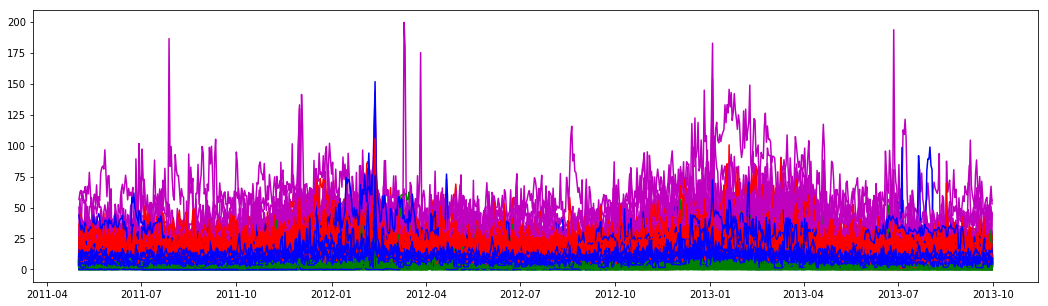

In [23]:
fig = plt.figure(figsize=(18, 5))
LABEL_COLOR_MAP = {0 : 'r',
                   1 : 'g',
                   2 : 'm',
                   3 : 'b'
                   }
label_color = [LABEL_COLOR_MAP[l] for l in labels]

#save the lines in a list
lines=plt.plot(df_training.iloc[:,1:].transpose())

#go through the list of lines
for line,colori in zip(lines,label_color):
    plt.setp(line, color=colori)  #linewidth=2.0
plt.show()